# Homework 2

**Yiğit Berk SARIBOĞA**

In [1]:
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
import requests
from pandas.io.json import json_normalize
import random
from math import isnan
import wbgapi as wb
import numpy as np
import itertools

# Question 1

For this question we are going to use an [NBA dataset](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/).

**Step 1:** Get the data from the season 2018-2019 as a pandas dataframe. Explain each column in the dataset.

**Step 2:** Write a function that takes the GAME_ID as the parameter and returns the full dataset for a given match. Test your function on 5 random matches.

**Step 3:** Write a function that takes the GAME_ID as the parameter and returns a dictionary of (key,value) pairs where key is a player name and value is how many times that specific player appears in PLAYER1_NAME,PLAYER2_NAME, or PLAYER3_NAME columns.

**Step 4:** Plot the results of Step 3 as a bar chart sorted from the most active player to the least active player for 5 random games.

## Answers

### Step 1

Ingesting data of the 2018-2019 Season

In [2]:
nba = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
nba

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


Each column name in the dataset

In [3]:
nba.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

### Step 2

"game_id" is a function that collects all the data in the match into a data frame according to the GAME_ID

In [4]:
def game_id(data,gameid):
    grouped_gameid = data.groupby(data.GAME_ID)
    raw_grouped_gameid = grouped_gameid.get_group(gameid)
    return pd.DataFrame(raw_grouped_gameid)

In [5]:
raw_counter = nba["GAME_ID"]
counter_nba = Counter(raw_counter)

Creating an array consisting only of GAME_ID'S

In [6]:
game_ids = np.unique(nba["GAME_ID"])
game_ids

array([21800001, 21800002, 21800003, ..., 21801228, 21801229, 21801230],
      dtype=int64)

Testing the function

In [7]:
for i in range(5):
    ID = random.choice(game_ids)
    test = game_id(nba, ID)
    display(test.head())

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
505395,0,0,12,2,21800729,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
505396,1,0,10,4,21800729,Jump Ball Gobert vs. Towns: Tip to Gibson,NaN,12:00,1,4.0,...,201959,Taj Gibson,MIN,Minnesota,1.610613e+09,Timberwolves,NaN,NaN,NaN,9:11 PM
505397,2,1,2,7,21800729,NaN,NaN,11:46,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Towns 24' 3PT Jump Shot,9:11 PM
505398,3,0,4,8,21800729,Gobert REBOUND (Off:0 Def:1),NaN,11:42,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
505399,4,6,2,9,21800729,MISS Rubio 2' Driving Layup,NaN,11:28,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
470647,0,0,12,2,21800845,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:11 PM
470648,1,0,10,4,21800845,Jump Ball Towns vs. Zubac: Tip to Beverley,NaN,12:00,1,4.0,...,201976,Patrick Beverley,LAC,LA,1.610613e+09,Clippers,NaN,NaN,NaN,8:11 PM
470649,2,1,2,7,21800845,NaN,NaN,11:43,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Gallinari 26' 3PT Jump Shot,8:11 PM
470650,3,0,4,8,21800845,NaN,NaN,11:39,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Temple REBOUND (Off:1 Def:0),8:11 PM
470651,4,1,1,9,21800845,NaN,NaN,11:35,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,3 - 0,-3,Gilgeous-Alexander 3PT Jump Shot (3 PTS) (Bev...,8:11 PM


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
388144,0,0,12,2,21800985,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:41 PM
388145,1,0,10,4,21800985,Jump Ball Zubac vs. Adams: Tip to Westbrook,NaN,12:00,1,4.0,...,201566,Russell Westbrook,OKC,Oklahoma City,1.610613e+09,Thunder,NaN,NaN,NaN,10:41 PM
388146,2,79,1,7,21800985,NaN,NaN,11:45,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Westbrook 13' Pullup Jump Shot (2 PTS) (Adams ...,10:42 PM
388147,3,6,1,9,21800985,Gallinari 3' Driving Layup (2 PTS),NaN,11:28,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 2,TIE,NaN,10:42 PM
388148,4,2,6,10,21800985,NaN,NaN,11:28,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adams S.FOUL (P1.T1) (K.Mauer),10:42 PM


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
58701,0,0,12,2,21800552,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
58702,1,0,10,4,21800552,Jump Ball Cauley-Stein vs. Nurkic: Tip to Hark...,NaN,12:00,1,4.0,...,203090,Maurice Harkless,POR,Portland,1.610613e+09,Trail Blazers,NaN,NaN,NaN,9:11 PM
58703,2,6,2,7,21800552,NaN,NaN,11:34,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Harkless 3' Driving Layup,9:12 PM
58704,3,0,4,8,21800552,Cauley-Stein REBOUND (Off:0 Def:1),NaN,11:32,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
58705,4,44,1,9,21800552,Shumpert 2' Reverse Layup (2 PTS) (Cauley-Stei...,NaN,11:10,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,0 - 2,2,NaN,9:12 PM


,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
530403,0,0,12,2,21801136,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3:41 PM
530404,1,0,10,4,21801136,Jump Ball Zubac vs. Thompson: Tip to Osman,NaN,12:00,1,4.0,...,1626224,Cedi Osman,CLE,Cleveland,1.610613e+09,Cavaliers,NaN,NaN,NaN,3:41 PM
530405,2,6,1,7,21801136,NaN,NaN,11:44,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Osman 2' Driving Layup (2 PTS),3:41 PM
530406,3,6,1,8,21801136,Gilgeous-Alexander 1' Driving Layup (2 PTS),NaN,11:25,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 2,TIE,NaN,3:42 PM
530407,4,80,2,9,21801136,NaN,NaN,11:01,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Osman 11' Step Back Jump Shot,3:42 PM


### Step 3

"playername" is a function that creates a dictionary containing the pair of the player's name and the number of times that specific player appears in PLAYER1_NAME, PLAYER2_NAME, or PLAYER3_NAME columns

In [8]:
def playername(data,gameid):
    grouped_gameid = data.groupby(data.GAME_ID)
    raw_grouped_gameid = grouped_gameid.get_group(gameid)
    player1_name = raw_grouped_gameid["PLAYER1_NAME"].dropna()
    player1 = Counter(player1_name)
    player2_name = raw_grouped_gameid["PLAYER2_NAME"].dropna()
    player2 = Counter(player2_name)
    player3_name = raw_grouped_gameid["PLAYER3_NAME"].dropna()
    player3 = Counter(player3_name)
    res = player1 + player2 + player3
    return dict(res)

### Step 4

Testing the function

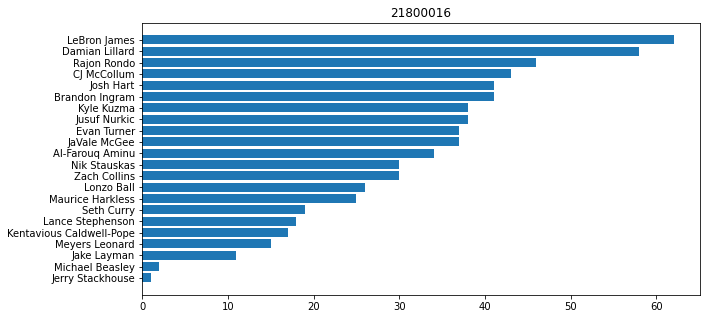

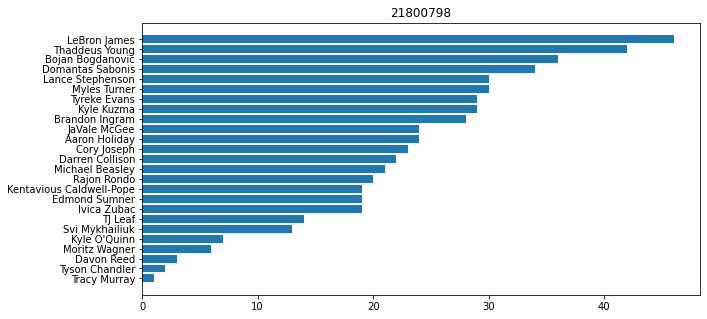

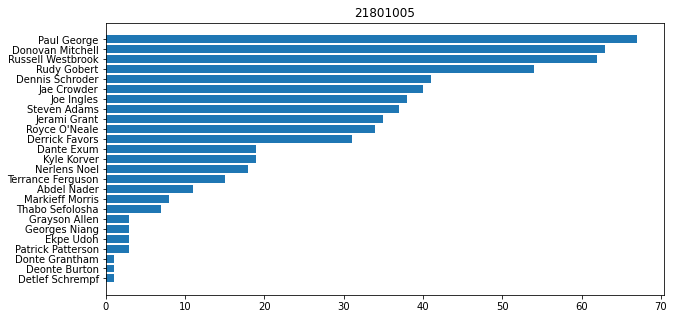

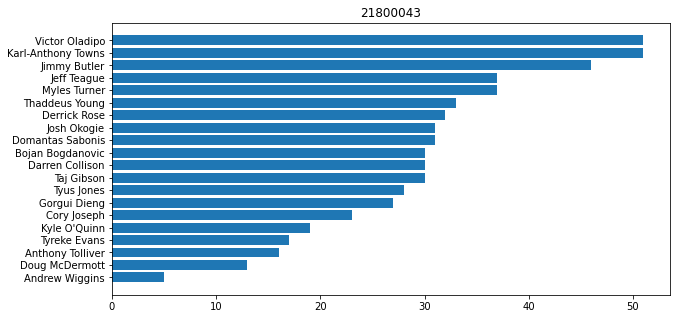

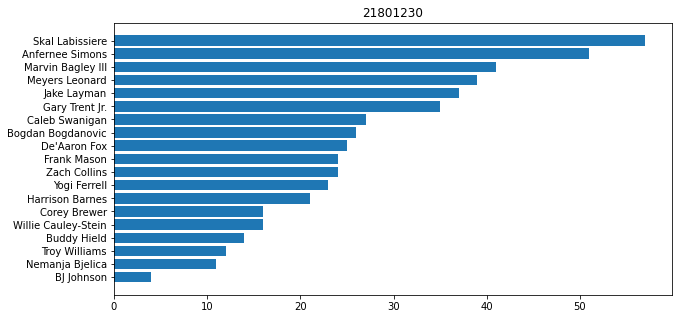

In [9]:
for i in range(5):
    ID = random.choice(list(game_ids))
    test = dict(sorted(playername(nba, ID).items(), key=lambda x: x[1]))
    label = list(test.keys())
    value = test.values()

    plt.figure(figsize=(10,5))
    plt.title(ID)
    plt.barh(label, value)
plt.show()

# Question 2

For this question we are going to use [a sample](https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json) from [Spottify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

**Step 1:** Ingest the data as a python dictionary using the json library.

**Step 2:** Construct a complete list of all artists appearing in the dictionary you obtained in step 1. Then using Counter function count how many times each artist appears.

**Step 3:** Filter out those artists that appear fewer than 100 times, and then sort the remaining from the most popular to least popular.

**Step 4:** Plot the result you obtain from Step 3 as a bar chart.

**Step 5:** Repeat Steps 2-4 for the Songs instead of Artists by filtering out the songs that appear 25 times or fewer.

## Answers

### Step 1

Ingesting json data as a dictionary

In [10]:
rawdata2 = urlopen('https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json')
json_Q2 = json.loads(rawdata2.read())

### Step 2

Creating a complete list of all artists appearing in the dictionary

In [11]:
df_Q2 = pd.json_normalize(json_Q2, record_path =['playlists','tracks'])
artist_names = df_Q2["artist_name"].tolist()

Counting how many times each artist appeared in the list using the "Counter" function

In [12]:
counter_artist = Counter(artist_names)

### Step 3

In [13]:
artist_counter = pd.DataFrame.from_dict(counter_artist, orient='index').reset_index()
artist_counter.columns = ['artist_names', 'values']
artist_counter

,artist_names,values
0,Missy Elliott,52
1,Britney Spears,88
2,Beyoncé,234
3,Justin Timberlake,116
4,Shaggy,52
...,...,...
9717,Layla,1
9718,Aayushi,1
9719,Jon D,1
9720,Big Words,1


Removing artists who have appeared less than 100 times from the list, and sorting the rest by most popular to least popular

In [14]:
artists = artist_counter.drop(artist_counter.loc[artist_counter['values'] < 100].index).sort_values('values', ascending=False)
artists

,artist_names,values
344,Drake,939
431,Kanye West,415
357,Kendrick Lamar,385
205,Rihanna,350
831,Eminem,332
...,...,...
463,Kid Cudi,102
347,YG,101
1423,5 Seconds of Summer,101
226,The Lumineers,101


### Step 4

Drawing the data obtained in the previous step as a bar chart

<BarContainer object of 96 artists>

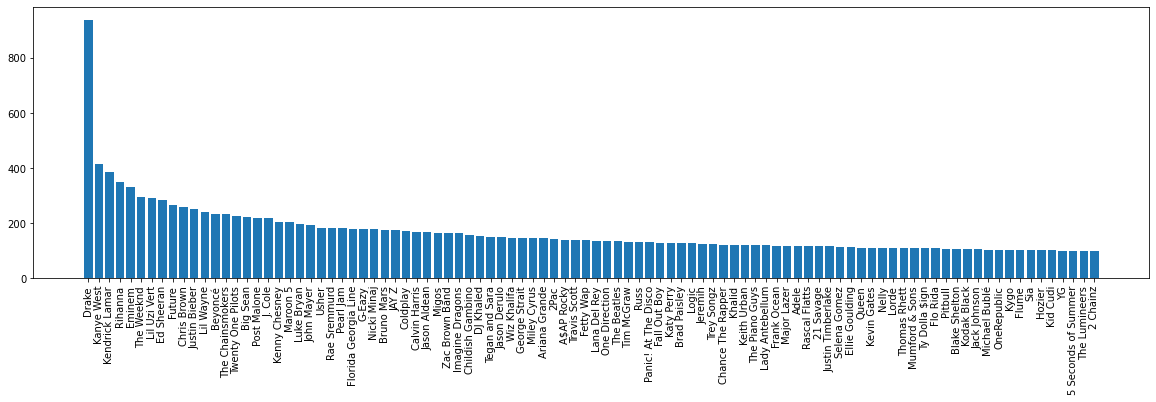

In [15]:
figure_artist = artists.sort_values('values', ascending=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
labels1 = list(figure_artist['artist_names'])
values1 = figure_artist['values']
plt.bar(labels1,values1)

### Step 5

Creating a complete list of all tracks appearing in the dictionary

In [16]:
track_names = df_Q2["track_name"].tolist()

In [17]:
type(track_names)

list

Counting how many times each tracks appeared in the list using the "Counter" function

In [18]:
counter_tracks = Counter(track_names)

In [19]:
track_counter = pd.DataFrame.from_dict(counter_tracks, orient='index').reset_index()
track_counter.columns = ['track_names', 'values']
track_counter

,track_names,values
0,Lose Control (feat. Ciara & Fat Man Scoop),6
1,Toxic,14
2,Crazy In Love,28
3,Rock Your Body,9
4,It Wasn't Me,25
...,...,...
30044,U Make Me Feel Good,1
30045,Diamond Child,1
30046,The Answer,1
30047,25.22,1


Removing tracks that appear 25 times or less from the list and sorting the rest by most popular to least popular

In [20]:
tracks = track_counter.drop(track_counter.loc[track_counter['values'] <= 25].index).sort_values('values', ascending=False)
tracks

,track_names,values
35,Closer,75
3596,One Dance,55
1323,HUMBLE.,52
1002,Ride,52
1382,Broccoli (feat. Lil Yachty),50
...,...,...
535,Go Flex,26
4541,Gravity,26
4505,Heartbeat,26
1032,My Girl,26


Drawing the data obtained in the previous step as a bar chart

<BarContainer object of 110 artists>

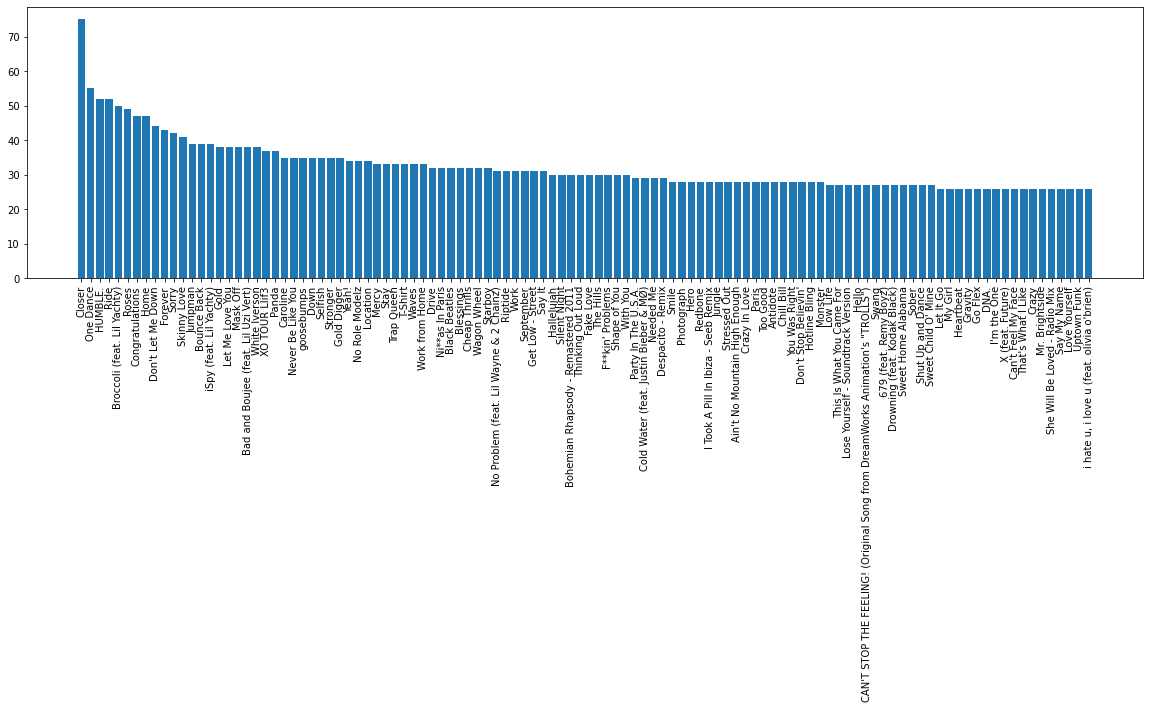

In [21]:
figure_tracks = tracks.sort_values('values', ascending=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
labels2 = list(figure_tracks['track_names'])
values2 = figure_tracks['values']
plt.bar(labels2,values2)

# Question 3

For this question we are going to use Wordbank Data. I would suggest wbgapi library.

**Step 1:** Write a function that takes a country name and a list of indicators and returns a pandas data frame with the corresponding data.

**Step 2:** Get the data for Turkey for the following indicators:
* [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
* [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
* [Labor force participation rate, female (% of female population ages 15+) (SL.TLF.CACT.FE.NE.ZS)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.NE.ZS)
* [Mortality rate, under-5 (per 1,000 live births) (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)
* [Literacy rate, adult female (% of females ages 15 and above) (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)

**Step 3:** Write a function that draws a line plot for a given list of indicators against time (i.e. the x-axis will be the time) AFTER it drops the years where data is not available. Draw a line plot for Turkey for all of the indicators I listed above.

**Step 4:** Write a function that takes two indicators id1 and id2 and does a scatter plot of id1 against id2 after it drops the years where data is not available for one of the indicators. Your plot must have labels on the x- and the y-axes to indicate which indicators were used. Then draw a scatter plot (10 in total) for every pair of indicators I listed above.

## Answers

### Step 1

"worldbank" is a function that takes the country name and a list of indicators and returns a pandas data frame with the corresponding data

In [22]:
def worldbank(country_code,indicators):
    wb_df = pd.DataFrame(wb.data.fetch(indicators))
    res = wb_df[wb_df['economy'] == country_code][['value','time']]
    res.sort_values(by='time', inplace=True)
    res.index = res['time']
    return res

### Step 2

Ingesting Turkey data for relevant indicators

In [23]:
pov = worldbank('TUR','SI.POV.NAHC')
chex = worldbank('TUR','SH.XPD.CHEX.PC.CD')
tlf = worldbank('TUR','SL.TLF.CACT.FE.NE.ZS')
mort = worldbank('TUR','SH.DYN.MORT')
litr = worldbank('TUR','SE.ADT.LITR.FE.ZS')

### Step 3

In [24]:
var = [pov,chex,tlf,mort,litr]
name = ['Poverty headcount ratio at national poverty lines','Current health expenditure per capita',
        'Labor force participation rate, female (% of female population ages 15+)',
        'Mortality rate, under-5 (per 1,000 live births)','Literacy rate, adult female (% of females ages 15 and above)']

"wblineplot" is a function that plots a line graph against time for a list of indicators

In [25]:
def wblineplot(indicators):
    base = indicators.dropna()
    plt.figure(figsize=(15,6))
    plt.tick_params(axis='x', labelrotation=90)
    plt.plot(base['value'])

Plotting of Turkey data for all relevant indicators

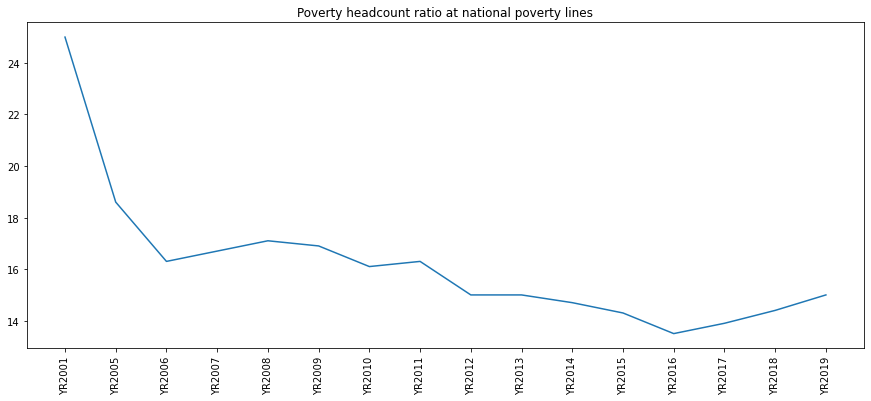

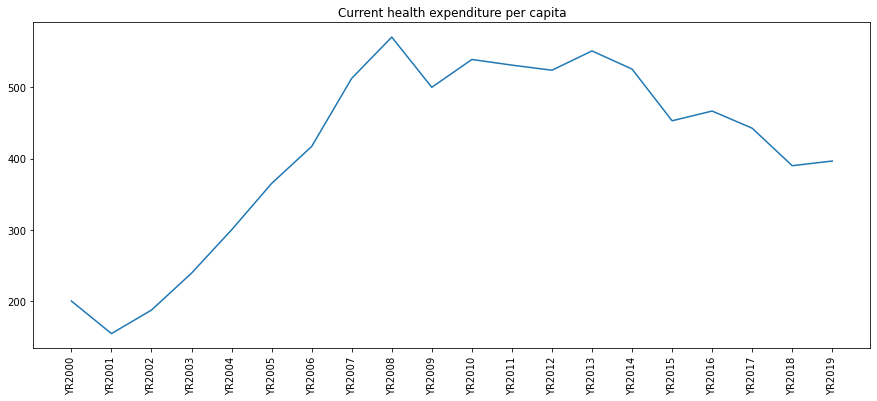

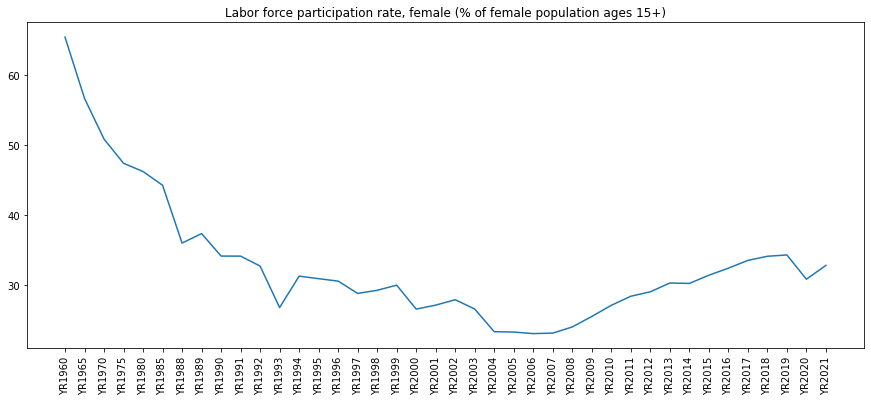

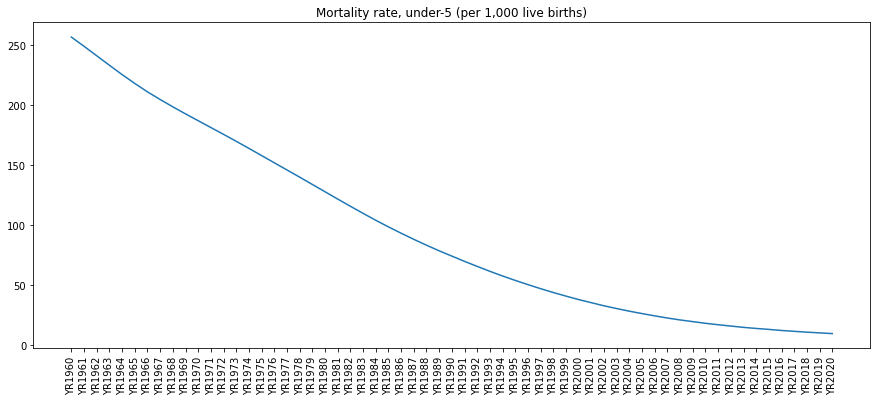

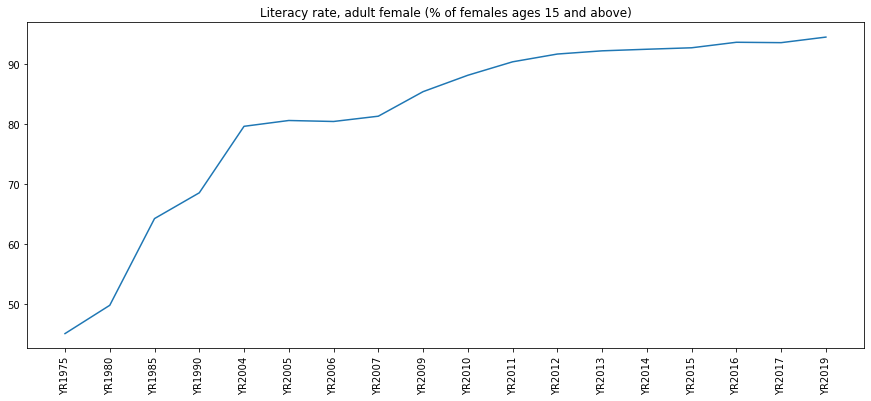

In [26]:
for i in range(5):
    wblineplot(var[i])
    plt.title(name[i])

### Step 4

"wbscatterplot" is a function that takes two indicators and makes a scatter plot between them

In [27]:
def wbscatterplot(id1,id2):
    id1.dropna()
    id2.dropna()
    plt.figure(figsize=(7,7))
    plt.scatter(id1["value"], id2["value"], c ="blue", alpha=0.5)

Drawing a scatter plot for each pair of indicators

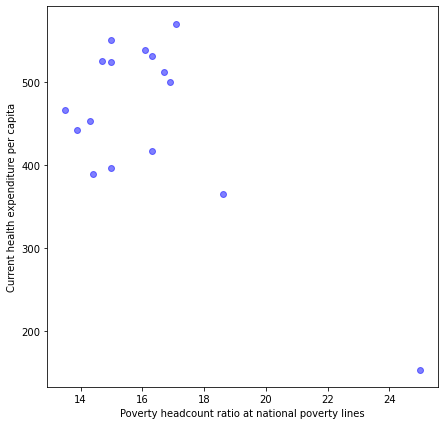

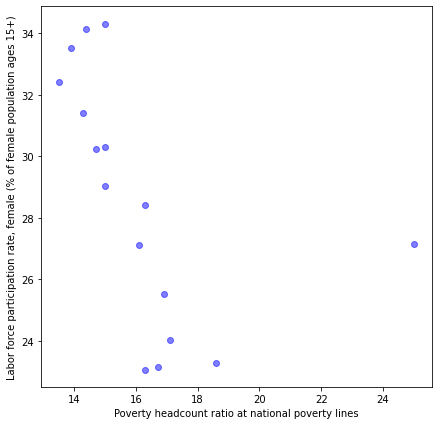

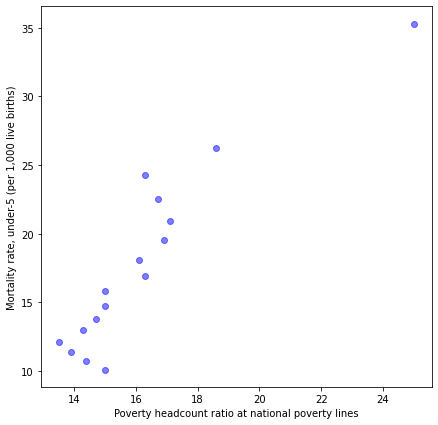

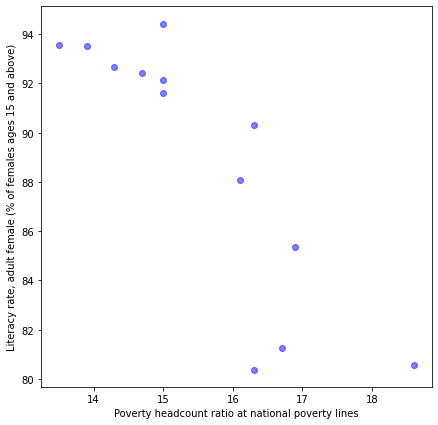

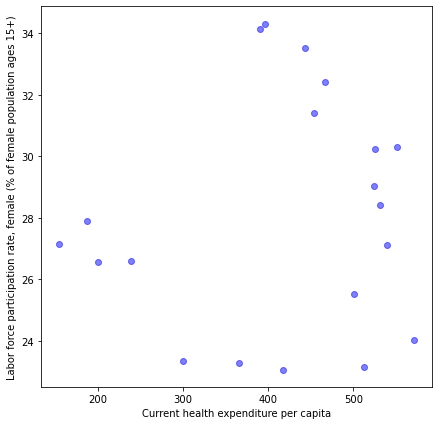

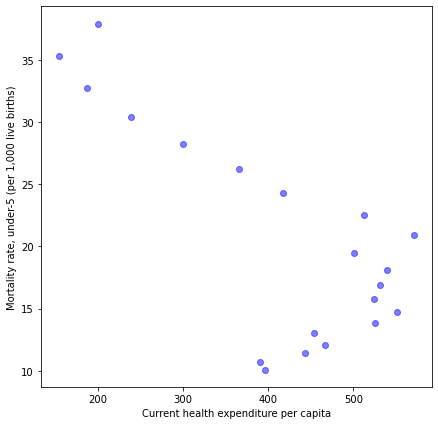

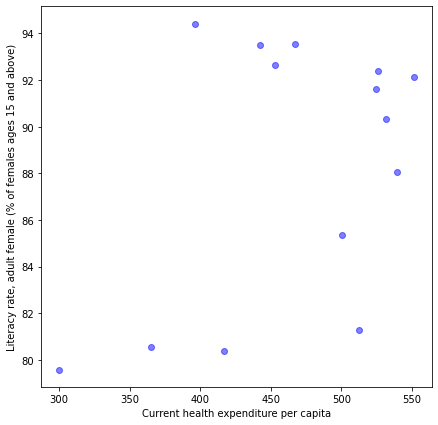

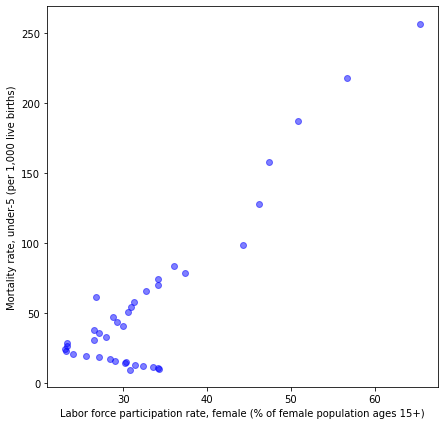

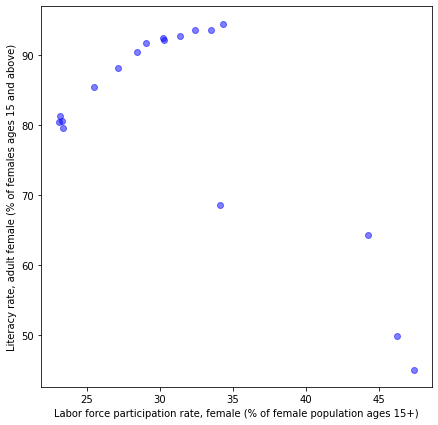

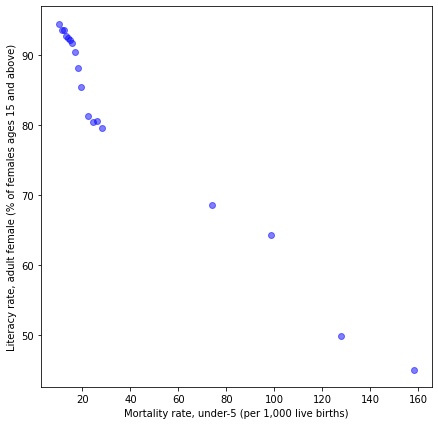

In [28]:
for var1, var2 in itertools.combinations(zip(var, name), 2):
    wbscatterplot(var1[0], var2[0])
    plt.xlabel(var1[1])
    plt.ylabel(var2[1])
    plt.show()